### Match traj to hex

In [1]:
from fmm import H3MM,hexs2wkt

In [2]:
traj = "LINESTRING (18.024101257324215 59.337523121884225, 18.03852081298828 59.34391321930451, 18.042125701904297 59.35353986273416, 18.056459426879883 59.36080179623859, 18.065214157104492 59.34964577662557)"

In [3]:
hex_level = 9
interpolate = False
result = H3MM.match_wkt(traj, hex_level, interpolate)

In [4]:
print result.traj_id
print list(result.hexs)
print hexs2wkt(result.hexs)

0
[618737091877535743, 618737091842146303, 618737091929178111, 618737091479863295, 618737091474358271]
MULTIPOLYGON(((18.0228898614 59.3354770125,18.0215924168 59.3365311866,18.0216285645 59.3383172704,18.0229621748 59.3390492484,18.0242596721 59.3379950872,18.0242235064 59.3362089351,18.0228898614 59.3354770125)),((18.0375257823 59.3417433897,18.0362279618 59.3427977119,18.036264136 59.3445842599,18.0375981486 59.3453165539,18.0388960218 59.3442622446,18.0388598297 59.3424756284,18.0375257823 59.3417433897)),((18.0430068757 59.3518196531,18.0417088444 59.3528739237,18.0417449583 59.3546607271,18.0430791214 59.3553933281,18.0443772054 59.3543390705,18.0443410735 59.3525521988,18.0430068757 59.3518196531)),((18.057648911 59.3580921665,18.0563505038 59.3591465851,18.056386644 59.3609338529,18.0577212093 59.3616667704,18.0590196693 59.3606123647,18.0589835112 59.3588250286,18.057648911 59.3580921665)),((18.065330875 59.3464027176,18.0640324062 59.3474574216,18.0640686964 59.349244775,18.0

### Plot result

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
from shapely import wkt

In [73]:
def plot_traj_hex(traj_geom, hex_geom, margin = 0.01):
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    patches = []
    tc = "C1"
    hc = "C4"
    x,y = traj_geom.xy
    ax.plot(x,y,c=tc,marker="o",ms=6,lw=2,markeredgewidth=4, markeredgecolor=tc)
    for geom in hex_geom.geoms:
        x,y = geom.exterior.xy
        ax.fill(x, y, fc = hc, ec="w",linewidth=2, alpha = 0.8)
    ax.tick_params(axis='both',left=False, top=False, right=False, bottom=False, 
                   labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    minx, miny, maxx, maxy = traj_geom.envelope.buffer(margin).bounds
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)
#     ax.set_aspect(1.0)
    return fig,ax

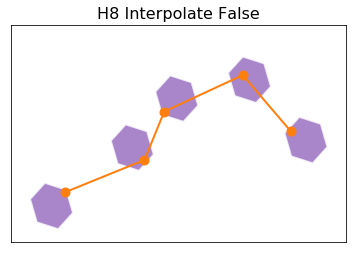

In [74]:
level = 8
interpolate = False
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom)
# plt.tight_layout()
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

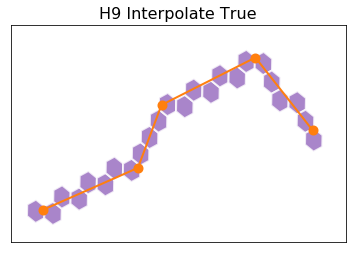

In [75]:
level = 9
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom,margin=0.005)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

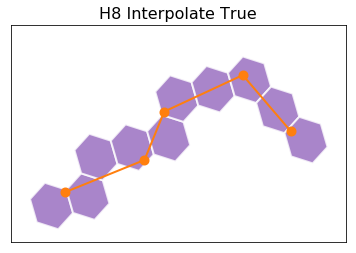

In [76]:
level = 8
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

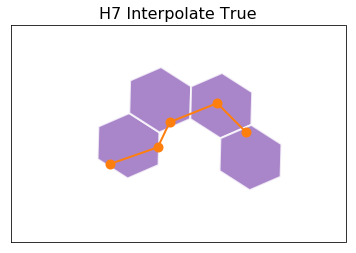

In [77]:
level = 7
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom,margin=0.03)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

### Plot as a whole

In [11]:
levels = [8, 8, 9, 7]
interpolates = [False, True, True, True]

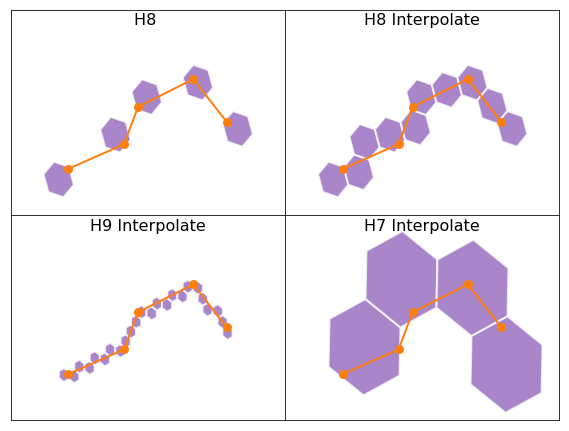

In [12]:
fig,axes = plt.subplots(2,2,figsize=(8,6.1))
patches = []
tc = "C1"
hc = "C4"
for level,interpolate,ax in zip(levels,interpolates,axes.flatten()):
    result = H3MM.match_wkt(traj, level, interpolate)
    traj_geom = wkt.loads(traj)
    hex_geom = wkt.loads(hexs2wkt(result.hexs))
    x,y = traj_geom.xy
    ax.plot(x,y,c=tc,marker="o",ms=5,lw=2,markeredgewidth=4)
    for geom in hex_geom.geoms:
        x,y = geom.exterior.xy
        ax.fill(x, y, fc = hc, ec="w",linewidth=2, alpha = 0.8)
    ax.tick_params(axis='both',left=False, top=False, right=False, bottom=False, 
                   labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    ax.set_aspect(1.0)
    ax.set_title("H{} {}".format(level,("","Interpolate")[interpolate]),position=(0.5, 0.9),fontsize=16)
    minx, miny, maxx, maxy = traj_geom.envelope.buffer(0.015).bounds
    yoffset = 0.003
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny+yoffset,maxy+yoffset)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig("h3demo.png",dpi=300,bbox_inches='tight',pad_inches=0)    